# Kaggle: titanic

В данном проекте я участвую в соревновании: Titanic - Machine Learning from Disaster

## Первичный осмотр

In [1]:
# Импортирую необходимые компоненты
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,
                                     cross_val_score)
from catboost import CatBoostClassifier

In [2]:
# Загружаю данные
df_train = pd.read_csv('E:/Datasets/Titanic/train.csv', index_col = 'PassengerId')
df_test = pd.read_csv('E:/Datasets/Titanic/test.csv', index_col = 'PassengerId')
df_combine = pd.concat([df, df_test], sort=False)
df_len=df.shape[0]
df_test_final = pd.read_csv('E:/Datasets/Titanic/test.csv')

In [3]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [6]:
df_combine.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [8]:
df_combine.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

## Предобработка

In [ ]:
df_combine['Cabin'] = df['Cabin'].fillna('Unknown')
df_combine['Embarked'] = df['Embarked'].fillna('S')
df_combine['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [9]:
df_train['Cabin'] = df['Cabin'].fillna('Unknown')
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')
df_train['Embarked'] = df['Embarked'].fillna('S')
df_train['Fare'] = df['Fare'].fillna(df['Fare'].median())

Таблицу с пропусками, я заполню средними значениями по титулу человека

In [ ]:
df_combine['title']=df.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [10]:
df_train['title']=df.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
df_test['title']=df_test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

In [11]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [12]:
df_train['title']=df.title.map(newtitles)
df_test['title']=df_test.title.map(newtitles)

In [13]:
df_combine.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [14]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [15]:
df['Age']=df[['title','Sex','Age']].apply(newage, axis=1)
df_test['Age']=df_test[['title','Sex','Age']].apply(newage, axis=1)

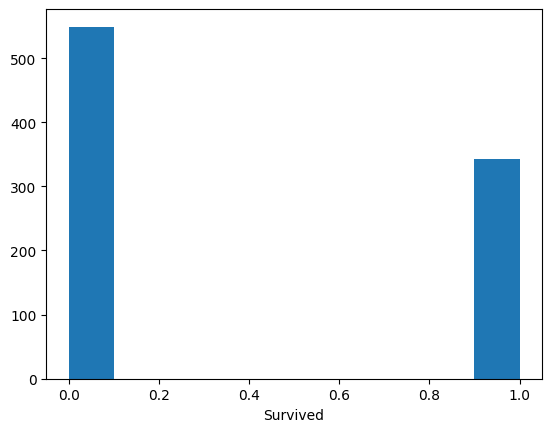

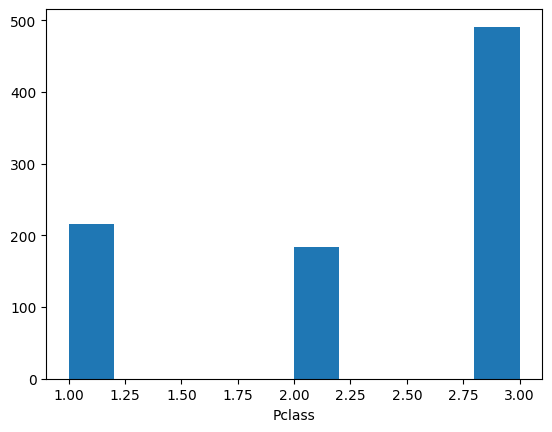

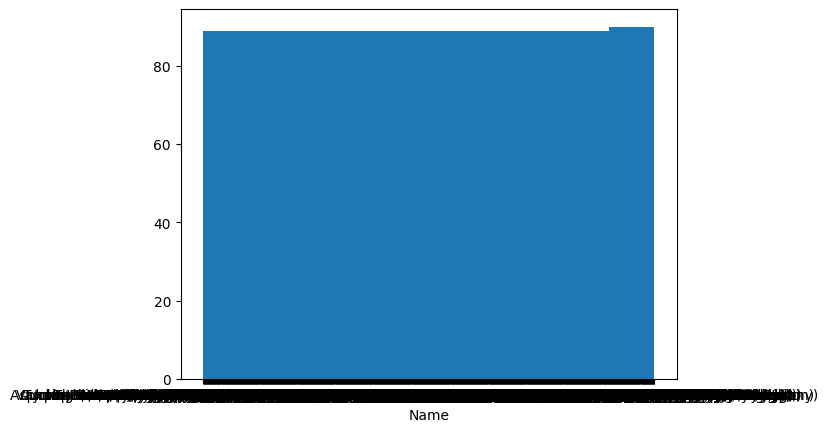

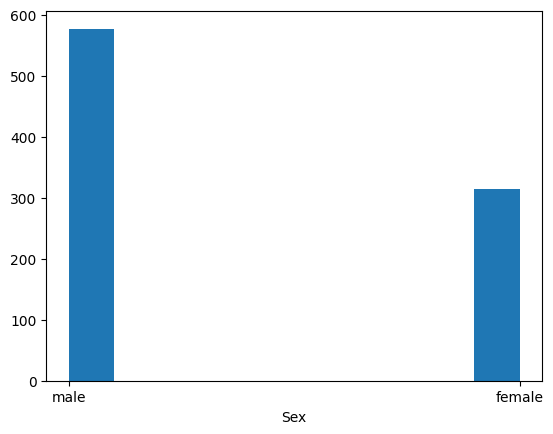

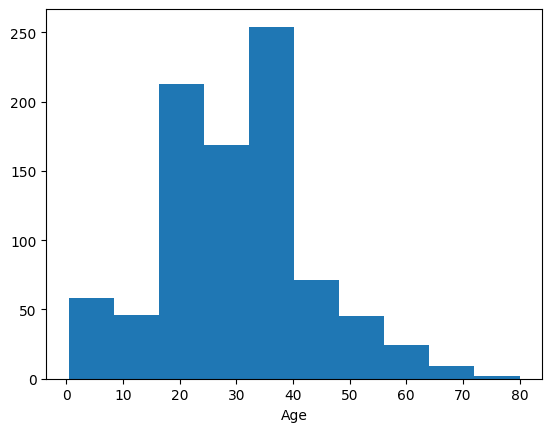

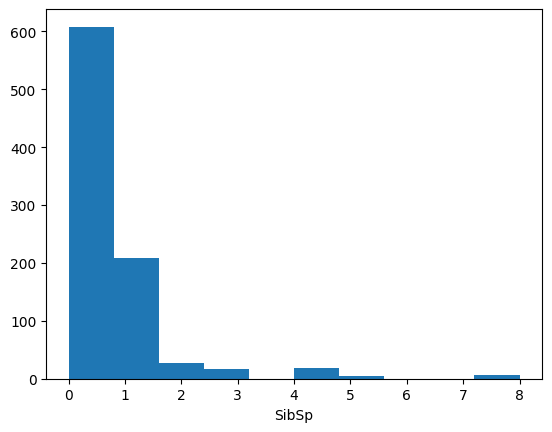

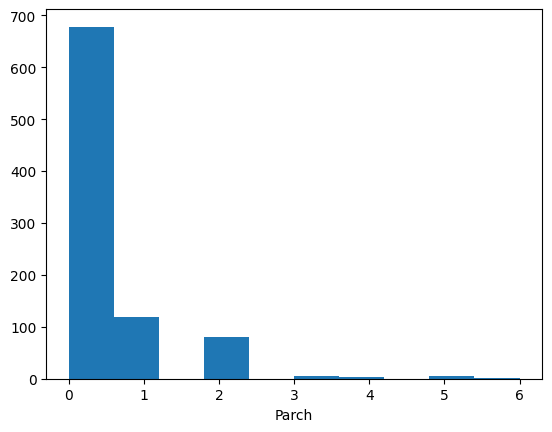

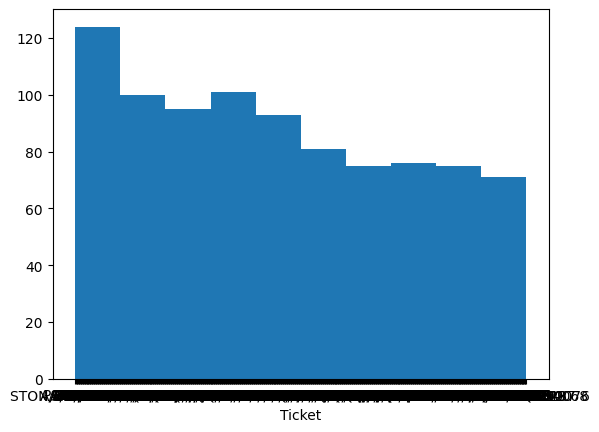

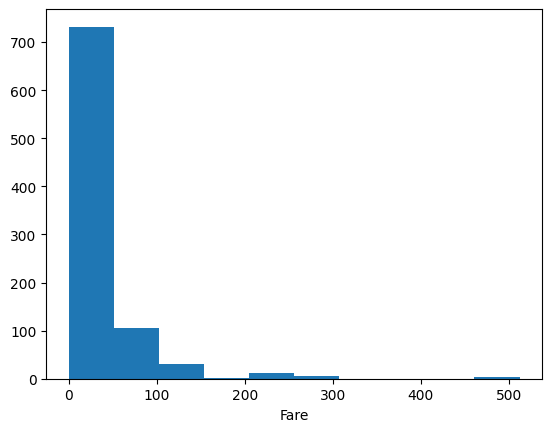

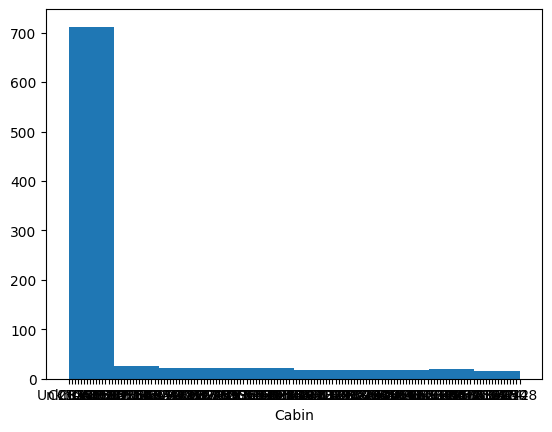

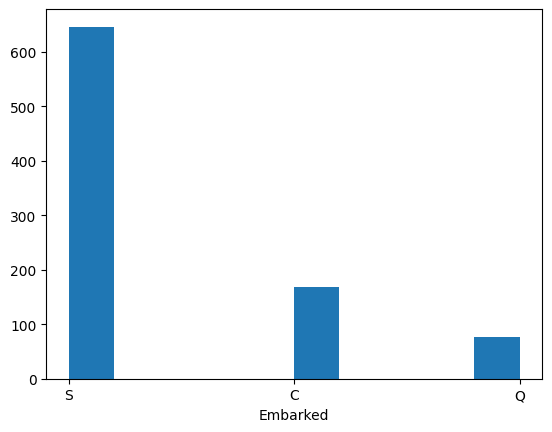

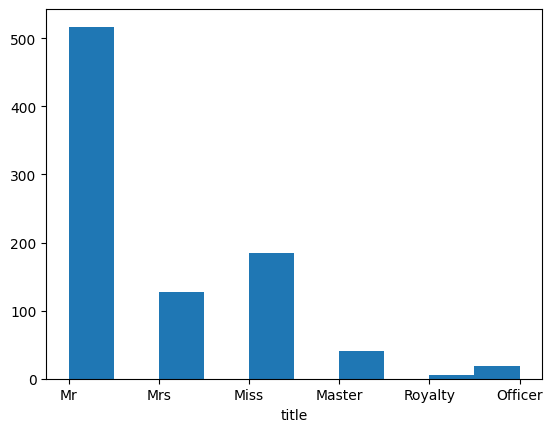

In [16]:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

In [17]:
df['Relatives']=df['SibSp']+df['Parch']
df_test['Relatives']=df_test['SibSp']+df_test['Parch']

df['Ticket2']=df['Ticket'].apply(lambda x : len(x))
df_test['Ticket2']=df_test['Ticket'].apply(lambda x : len(x))

df['Cabin2']=df['Cabin'].apply(lambda x : len(x))
df_test['Cabin2']=df_test['Cabin'].apply(lambda x : len(x))

df['Name2']=df['Name'].apply(lambda x: x.split(',')[0].strip())
df_test['Name2']=df_test['Name'].apply(lambda x: x.split(',')[0].strip())

In [18]:
df.drop(['Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_combine=pd.concat([df, df_test], sort=False)
df_combine=pd.get_dummies(df_combine)
df=df_combine[:df_len]
df_test=df_combine[df_len:]
df['Survived']=df['Survived'].astype('int')

D:\Temp\ipykernel_7016\1157007277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived']=df['Survived'].astype('int')


In [19]:
xtrain=df.drop("Survived",axis=1)
ytrain=df['Survived']
xtest=df_test.drop("Survived", axis=1)

## Подбор модели

In [20]:
rf_model = RandomForestClassifier(random_state = 21)
rf_grid = {
    'max_depth': [5, 20, 40, 80],
    'max_features': [1,2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [5,10,40,80],
    'criterion' : ['gini','entropy']
}
gs_forest = GridSearchCV(
    rf_model, 
    param_grid=rf_grid, 
    scoring='accuracy', 
    n_jobs=-1
)
gs_forest.fit(xtrain, ytrain)
print(f'best_score: {gs_forest.best_score_}')
print(f'best_params: {gs_forest.best_params_}')

best_score: 0.835019772770071
best_params: {'criterion': 'gini', 'max_depth': 40, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 40}


In [23]:
cat_model = CatBoostClassifier(random_state = 21,logging_level='Silent')
cat_grid = {'depth':[3,1,2,6,4,5,7],
          'iterations':[100, 250],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[5,10,20,50,100],
           }
gs_cat = GridSearchCV(
    cat_model, 
    param_grid=cat_grid, 
    scoring='accuracy', 
    n_jobs=-1
)
gs_cat.fit(xtrain,ytrain)
print(f'best_score: {gs_cat.best_score_}')
print(f'best_params: {gs_cat.best_params_}')

best_score: 0.849588851923922
best_params: {'border_count': 50, 'depth': 7, 'iterations': 250, 'l2_leaf_reg': 5, 'learning_rate': 0.3}


In [24]:
pred=gs_cat.predict(xtest)
output=pd.DataFrame({'PassengerId':df_test_final['PassengerId'],'Survived':pred})
output.to_csv('submission.csv', index=False)